In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# log Y axis
def result_plot(df, title, y_title):
    x = np.log(df['DataSize'])
    plt.plot(x, np.log(df['Case1']), marker='o', label='Case 1')
    plt.plot(x, np.log(df['Case2']), marker='o', label='Case 2')
    plt.plot(x, np.log(df['Case3_1']), marker='o', label='Case 3')
    
    plt.title(title + ' vs Data Size for different algorithms')
    plt.xlabel('Log Data Size in MB')
    plt.ylabel(y_title)
    plt.legend()

    # Display the plot
    plt.show()

# Read Results

In [18]:
df = pd.read_csv('result.csv', names = ['Test', 'Case', 'Data', 'Runtime', 'CPU Time', 'Peak Memory Usage'])

In [19]:
df

,Test,Case,Data,Runtime,CPU Time,Peak Memory Usage
0,NaN,0,1,2.000000,3.000000,4.000000
1,0.0,1,data/data_300MB.txt,32.917779,32.827400,4375.376206
2,1.0,1,data/data_2.5GB.txt,NaN,NaN,NaN
3,2.0,1,data/data_16GB.txt,NaN,NaN,NaN
4,3.0,2,data/data_300MB.txt,32.701031,32.625131,4375.474266
5,4.0,2,data/data_2.5GB.txt,NaN,NaN,NaN
6,5.0,2,data/data_16GB.txt,NaN,NaN,NaN
7,6.0,3-0,data/data_300MB.txt,33.718933,33.612905,5021.161525
8,7.0,3-0,data/data_2.5GB.txt,307.154919,296.659992,6635.572433
9,8.0,3-0,data/data_16GB.txt,2368.403880,2004.321685,11324.796134


In [20]:
datasize = {'data/data_300MB.txt': [300],
 'data/data_2.5GB.txt': [2.5*1024],
 'data/data_16GB.txt': [16*1024]
        }
df['Data'] = df['Data'].replace(datasize)

In [38]:
df

,Test,Case,Data,Runtime,CPU Time,Peak Memory Usage
0,NaN,0,1,2.000000,3.000000,4.000000
1,0.0,1,300,32.917779,32.827400,4375.376206
2,1.0,1,2560.0,NaN,NaN,NaN
3,2.0,1,16384,NaN,NaN,NaN
4,3.0,2,300,32.701031,32.625131,4375.474266
5,4.0,2,2560.0,NaN,NaN,NaN
6,5.0,2,16384,NaN,NaN,NaN
7,6.0,3-0,300,33.718933,33.612905,5021.161525
8,7.0,3-0,2560.0,307.154919,296.659992,6635.572433
9,8.0,3-0,16384,2368.403880,2004.321685,11324.796134


In [24]:
df1 = df[df['Case'] == "1"]
df2 = df[df['Case'] == "2"]
df3_1 = df[df['Case'] == "3-0"]
df3_2 = df[df['Case'] == "3-1"]
df3_3 = df[df['Case'] == "3-2"]

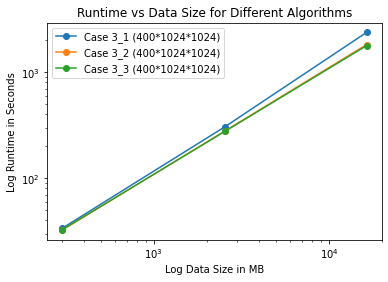

In [31]:
# plot Case 1 and Case 2
# plt.plot(df1['Data'], df1['Runtime'], marker='o', label='Case 1')
# plt.plot(df2['Data'], df2['Runtime'], marker='o', label='Case 2')
plt.plot(df3_1['Data'], df3_1['Runtime'], marker='o', label='Case 3_1 (400*1024*1024)')
plt.plot(df3_2['Data'], df3_2['Runtime'], marker='o', label='Case 3_2 (400*1024*1024)')
plt.plot(df3_3['Data'], df3_3['Runtime'], marker='o', label='Case 3_3 (400*1024*1024)')

plt.yscale('log')
plt.xscale('log')

plt.title('Runtime vs Data Size for Different Algorithms')
plt.xlabel('Log Data Size in MB')
plt.ylabel('Log Runtime in Seconds')
plt.legend()

# Display the plot
plt.show()

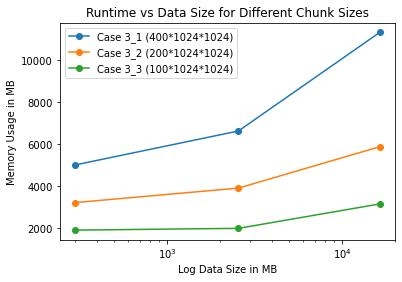

In [39]:
plt.plot(df3_1['Data'], df3_1['Peak Memory Usage'], marker='o', label='Case 3_1 (400*1024*1024)')
plt.plot(df3_2['Data'], df3_2['Peak Memory Usage'], marker='o', label='Case 3_2 (200*1024*1024)')
plt.plot(df3_3['Data'], df3_3['Peak Memory Usage'], marker='o', label='Case 3_3 (100*1024*1024)')

plt.xscale('log')

plt.title('Runtime vs Data Size for Different Chunk Sizes')
plt.xlabel('Log Data Size in MB')
plt.ylabel('Memory Usage in MB')
plt.legend()

# Display the plot
plt.show()